In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### LOADING DATASET

In [122]:
data=pd.read_csv('Bengaluru_House_Data.csv')

### DATA ANALYSIS

In [123]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [124]:
data.shape

(13320, 9)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### HANDLING NULL VALUES

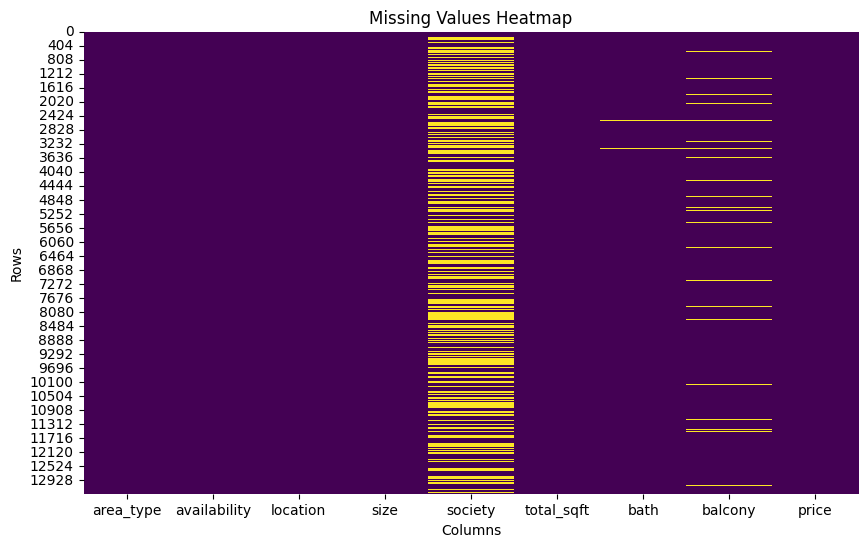

In [126]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
plt.show()

In [127]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### DATA VISUALIZATION

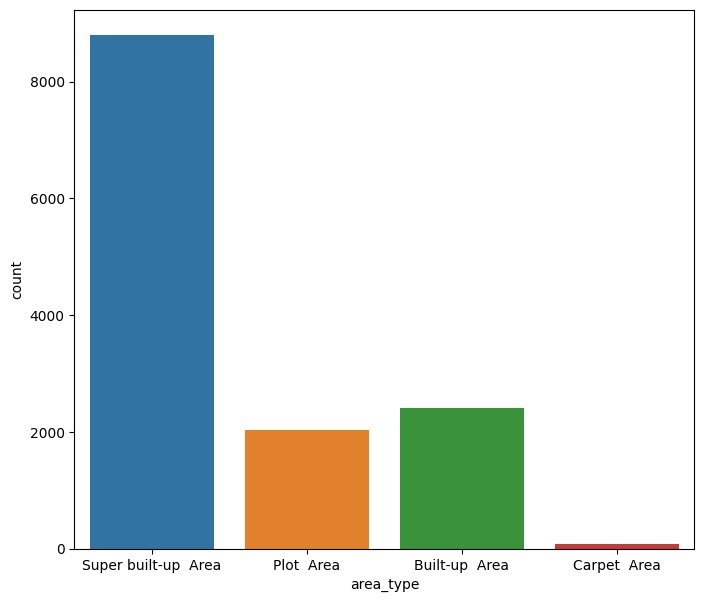

In [128]:
plot=plt.figure(figsize=(8,7))
ax=sns.countplot(x="area_type", data = data)

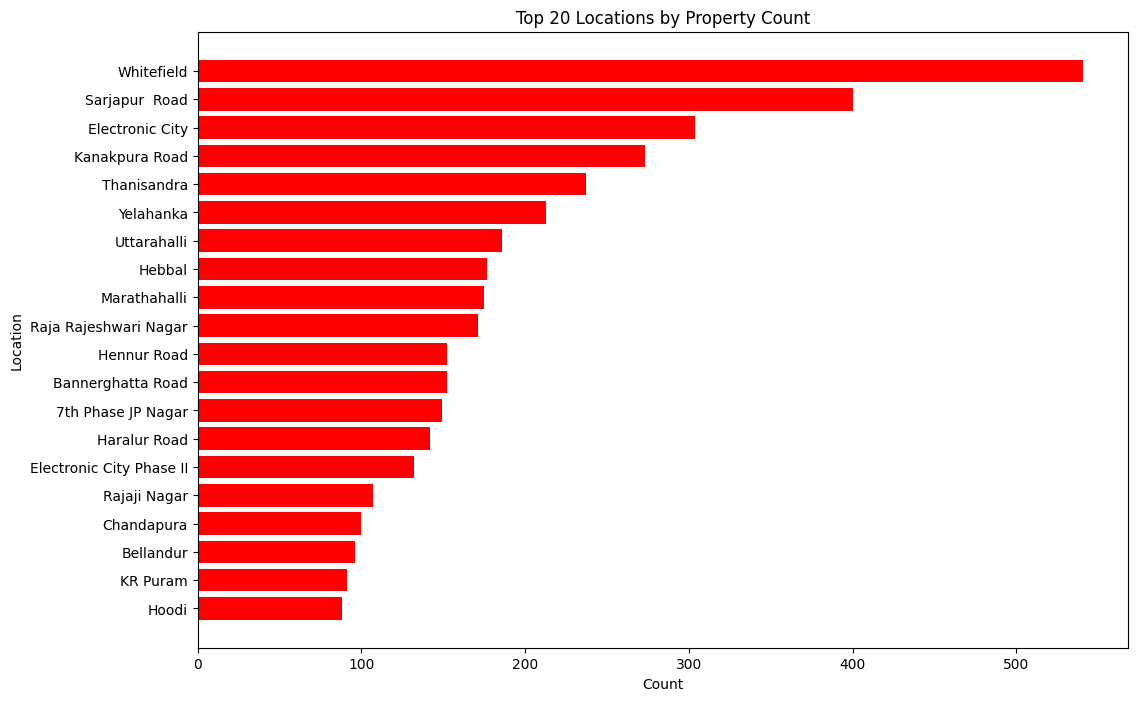

In [129]:
top_locations = location_count.head(20)

# Create a horizontal bar chart for the top locations
plt.figure(figsize=(12, 8))
plt.barh(top_locations.index, top_locations.values, color='red')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 20 Locations by Property Count')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.show()

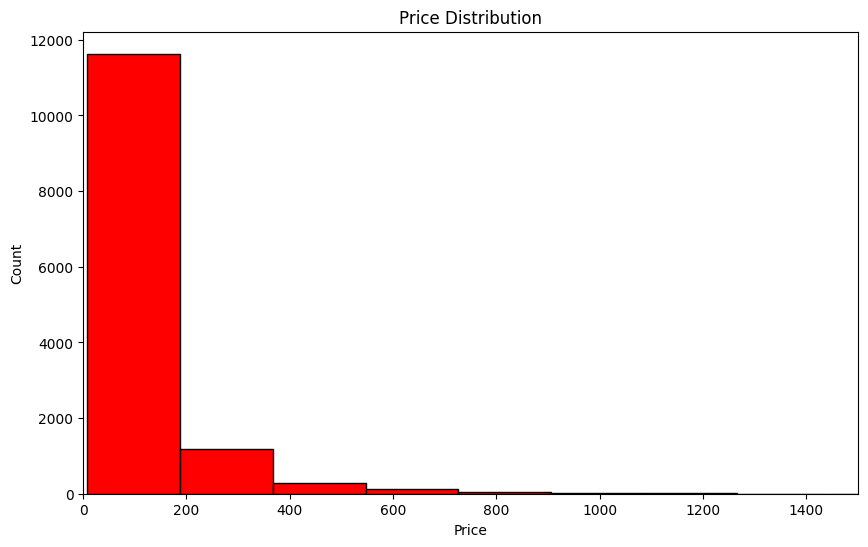

In [130]:
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=20, color='red', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.xlim(0, 1500)  
plt.show()

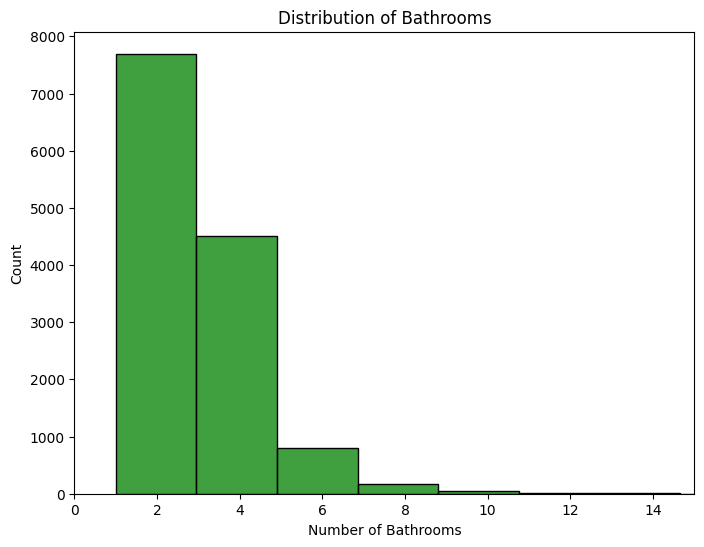

In [131]:
plt.figure(figsize=(8, 6))
sns.histplot(data['bath'], bins=20, color='green', edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Distribution of Bathrooms')
plt.xlim(0, 15)  
plt.show()

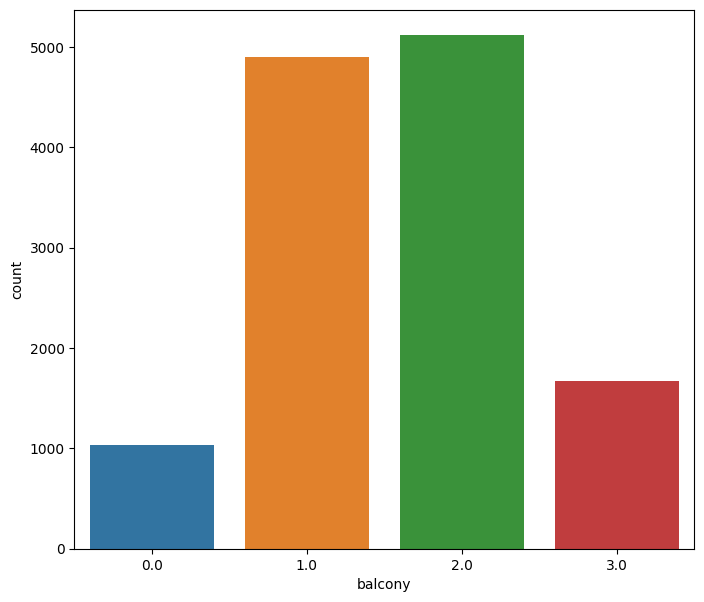

In [132]:
plot=plt.figure(figsize=(8,7))
ax=sns.countplot(x="balcony", data = data)

In [133]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [134]:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [135]:
data['size'].value_counts().sort_values(ascending=False)

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [136]:
data['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [137]:
data['total_sqft'].value_counts().sort_values(ascending=False)

total_sqft
1200           843
1100           221
1500           205
2400           196
600            180
              ... 
1119             1
1230 - 1290      1
492              1
2015             1
4689             1
Name: count, Length: 2117, dtype: int64

In [138]:
data['bath'].value_counts().sort_values(ascending=False)

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [139]:
data['balcony'].value_counts().sort_index()

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: count, dtype: int64

In [140]:
data=data.drop(['availability','society',],axis=1)

In [141]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [142]:
data['balcony'] = data['balcony'].fillna(data['balcony'].mean())

In [143]:
#data = pd.get_dummies(data, columns=['area_type'],drop_first=True)

In [144]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     13320 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [146]:
data['location'] = data['location'].fillna('Sarjapur  Road')

In [147]:
data['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [148]:
data['size'] = data['size'].fillna('2 BHK')

In [149]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   size        13320 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   balcony     13320 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [151]:
data.describe()

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.688814,1.584376,112.565627
std,1.338754,0.798360,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [152]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [153]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


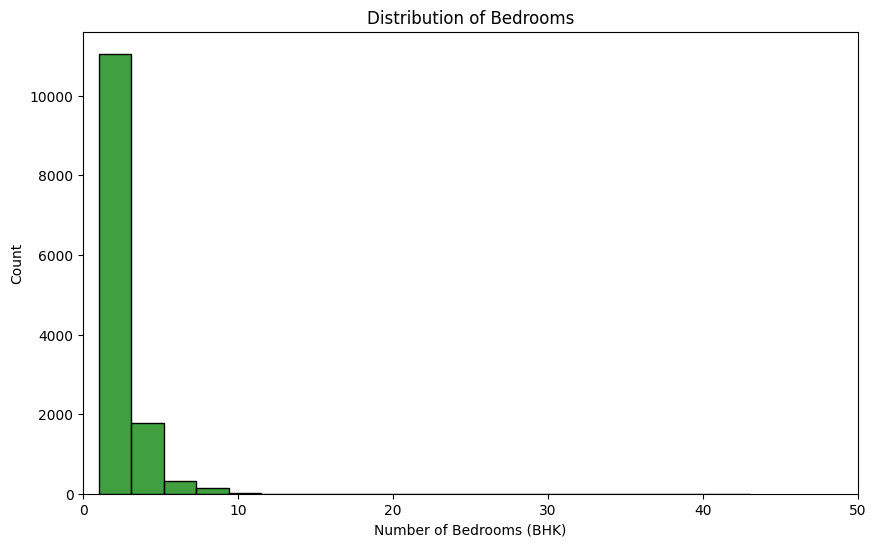

In [154]:
plt.figure(figsize=(10, 6))
sns.histplot(data["bhk"], bins=20, color='green', edgecolor='black')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms')
plt.xlim(0, 50)  
plt.show()

In [155]:
data=data.drop('size',axis=1)

In [156]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [157]:
data[data.bhk>20]

,area_type,location,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,2400,40.0,0.0,660.0,43


In [158]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float (temp[0])+ float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [159]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [160]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [161]:
data['price_per_sqft'] = data['price'] *100000 / data['total_sqft']

In [162]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


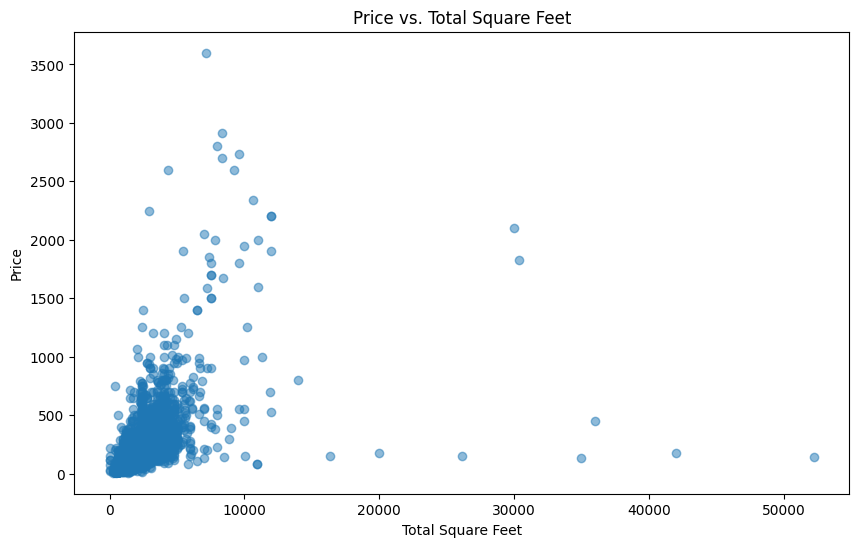

In [163]:
# Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(data['total_sqft'], data['price'], alpha=0.5)
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Price vs. Total Square Feet')
plt.show()

In [164]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count= data['location'].value_counts()
location_count

location
Whitefield                        541
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [165]:
location_count_less_10= location_count [location_count<=10] 
location_count_less_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [166]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [167]:
data['location'].value_counts()

location
other                 2885
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

### EXPLORING AND HANDLING OUTLIERS  

In [168]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.798360,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [169]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [170]:
data = data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,1.587513,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,0.792011,152.077329,0.976678,4162.237981
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


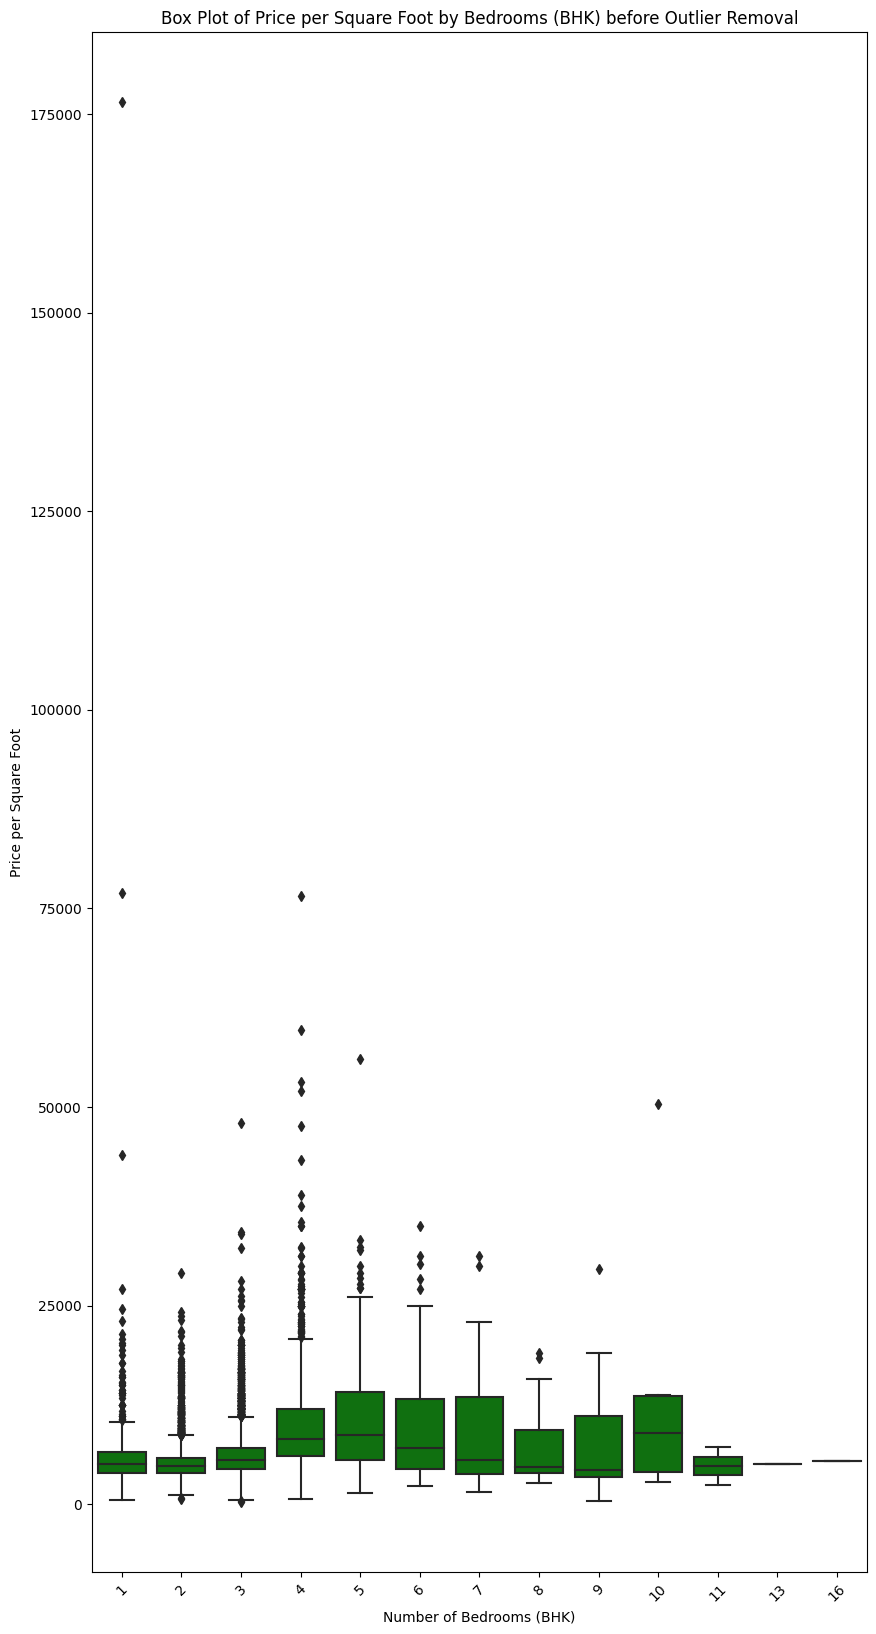

In [171]:
# Plot a box plot for 'price_per_sqft' before outlier removal
plt.figure(figsize=(10, 20))
sns.boxplot(x='bhk', y='price_per_sqft', data=data, color='green')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price per Square Foot')
plt.title('Box Plot of Price per Square Foot by Bedrooms (BHK) before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

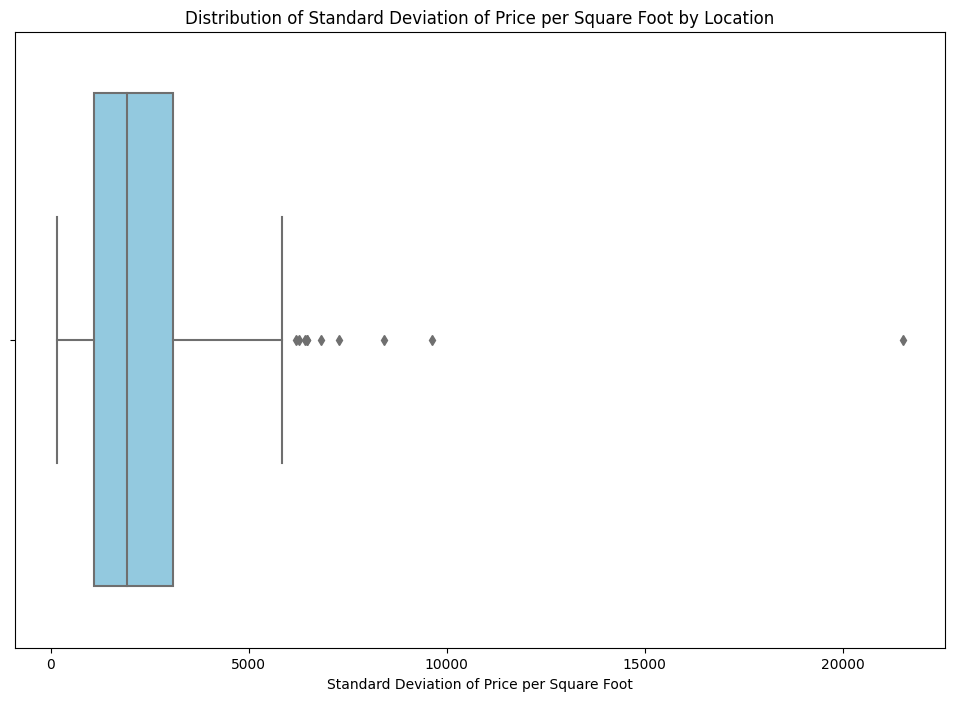

In [172]:
location_std_dev = data.groupby('location')['price_per_sqft'].std()

# Plot a box plot for the standard deviations
plt.figure(figsize=(12, 8))
sns.boxplot(x=location_std_dev, color='skyblue')
plt.xlabel('Standard Deviation of Price per Square Foot')
plt.title('Distribution of Standard Deviation of Price per Square Foot by Location')
plt.show()

In [173]:
data.shape

(12530, 8)

In [174]:
def remove_outliers_sqft (df):
    df_output= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        gen_df= subdf[(subdf.price_per_sqft> (m-st)) & (subdf.price_per_sqft <= (m+st))] 
        df_output = pd.concat([df_output, gen_df], ignore_index =True)
    return df_output

data= remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,1.592666,91.286372,2.574896,5659.062876
std,880.694214,0.979449,0.782541,86.342786,0.897649,2265.774749
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,1.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [175]:
def bhk_outlier_remover(df):
    exclude_indices =np.array([])
    for location, location_df in df.groupby("location"): 
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'): 
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft), 
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby( 'bhk'): 
            stats =bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [176]:
data=bhk_outlier_remover(data)

In [177]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1496.928526,2.448098,1.550625,99.094892,2.500543,6127.742397
std,865.839979,1.011563,0.775435,93.343057,0.929357,2409.144904
min,300.000000,1.000000,0.000000,10.000000,1.000000,1300.000000
25%,1095.750000,2.000000,1.000000,50.000000,2.000000,4600.000000
50%,1260.000000,2.000000,1.584376,73.100000,2.000000,5680.396754
75%,1680.000000,3.000000,2.000000,113.000000,3.000000,6896.551724
max,30000.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [178]:
data.shape

(7360, 8)

In [179]:
X=data.drop('price',axis=1)

In [180]:
y=data['price']

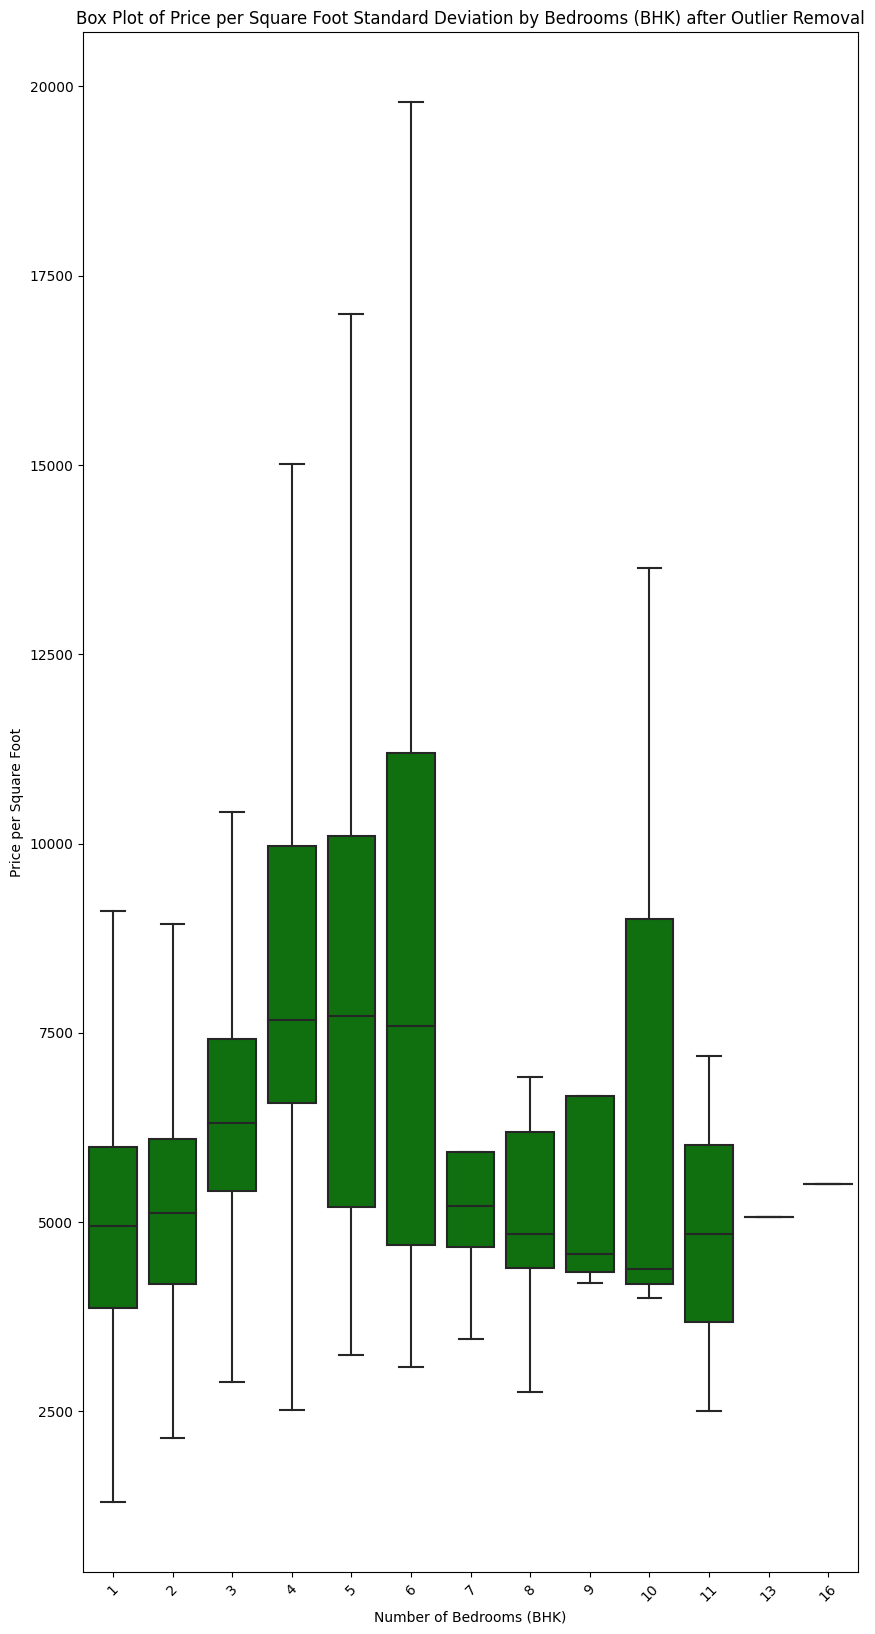

In [181]:
plt.figure(figsize=(10, 20))
sns.boxplot(x='bhk', y='price_per_sqft', data=data, showfliers=False, color='green')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price per Square Foot')
plt.title('Box Plot of Price per Square Foot Standard Deviation by Bedrooms (BHK) after Outlier Removal')
plt.xticks(rotation=45)
plt.show()

In [182]:
X.head()

,area_type,location,total_sqft,bath,balcony,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,2,11983.805668


### CORRELATION HEATMAP

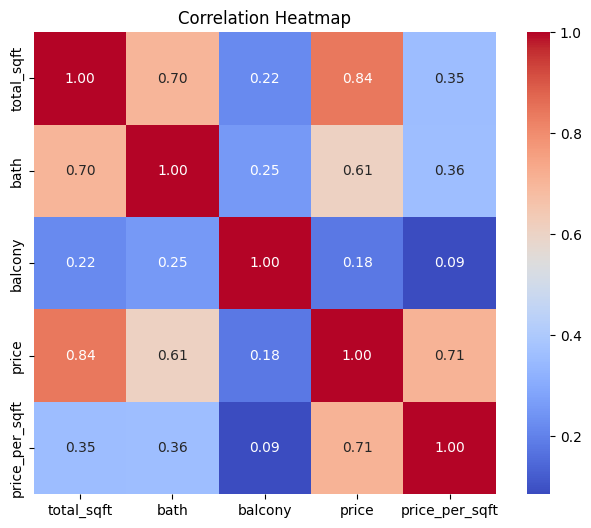

In [183]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

### TRAIN-TEST SPLIT 

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [186]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

In [187]:
print(X_train.shape)
print(y_train.shape)

(5888, 7)
(5888,)


###  ONE HOT ENCODING AND SCALING

In [188]:
column_trans= make_column_transformer ((OneHotEncoder (sparse=False,handle_unknown='ignore'), ['area_type','location']), remainder='passthrough')

In [189]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['area_type', 'location'])])

In [190]:
scaler=StandardScaler()

### LINEAR REGRESSION

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [192]:
lr=LinearRegression()

In [193]:
from sklearn.pipeline import make_pipeline

In [194]:
pipe=make_pipeline(column_trans,scaler,lr)

In [195]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['area_type', 'location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [196]:
y_pred_lr=pipe.predict(X_test)

In [197]:
print("R2 Score:",r2_score(y_test,y_pred_lr))

R2 Score: 0.9203218901894863


In [198]:
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

Mean Squared Error: 25.559404077001602


###  ELASTIC NET

In [199]:
from sklearn.linear_model import ElasticNet

In [200]:
base_elastic_model=ElasticNet(max_iter=10000)

In [201]:
param_grid={'alpha':[0.01,0.1,1,5,10,20,100],'l1_ratio':[.1,.7,.33,.5,.99,1] }

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
grid_model=GridSearchCV(base_elastic_model,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',
                       cv=5)

In [204]:
pipe_grid=make_pipeline(column_trans,scaler,grid_model)

In [205]:
pipe_grid.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['area_type', 'location'])])),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
                              param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20,
                                                    100],
                                          'l1_ratio': [0.1, 0.7, 0.33, 0.5,
                                                       0.99, 1]},
                              scoring='neg_mean_squared_error'))])

In [206]:
y_pred_grid=pipe_grid.predict(X_test)

In [207]:
print("R2 Score:",r2_score(y_test,y_pred_grid))

R2 Score: 0.9206846929906644


In [208]:
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_grid)))

Mean Squared Error: 25.501147151964368


### SUPPORT VECTOR REGRESSION (SVR)

In [209]:
from sklearn.svm import SVR

In [210]:
svr_regressor = SVR(kernel='linear')

In [211]:
pipe_svr=make_pipeline(column_trans,scaler,svr_regressor)

In [212]:
pipe_svr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['area_type', 'location'])])),
                ('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

In [213]:
y_pred_svr=pipe_svr.predict(X_test)

In [214]:
print("R2 Score:",r2_score(y_test,y_pred_svr))

R2 Score: 0.9048725975729034


In [215]:
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

Mean Squared Error: 27.927626746561497


### RANDOM FOREST REGRESSOR 

In [216]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [218]:
pipe_rf=make_pipeline(column_trans,scaler,rf_regressor)

In [219]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['area_type', 'location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [220]:
y_pred_rf=pipe_rf.predict(X_test)

In [221]:
print("R2 Score:",r2_score(y_test,y_pred_rf))

R2 Score: 0.9321875921008684


In [222]:
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Mean Squared Error: 23.57956535081296


### XG BOOST REGRESSOR 

In [223]:
import xgboost as xgb

In [224]:
xgb_regressor=xgb.XGBRegressor()

In [225]:
pipe_xgb=make_pipeline(column_trans,scaler,xgb_regressor)

In [226]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['area_type', 'location'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [227]:
y_pred_xgb=pipe_xgb.predict(X_test)

In [228]:
print("R2 Score:",r2_score(y_test,y_pred_xgb))

R2 Score: 0.9637815011716923


In [229]:
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

Mean Squared Error: 17.232426525112164


### USER INPUT 

In [230]:
#Super built-up Area	1st Block Jayanagar	2850.0	4.0	1.0	4	15017.543860"

In [231]:
def predict_price():
    feature_info = {
        'area_type': str,
        'location': str,
        'total_sqft': float,
        'bath': float,
        'balcony': float,
        'bhk': int,
        'price_per_sqft': float
    }
    user_input = {}
    for feature_name, data_type in feature_info.items():
        value = input(f"Enter {feature_name}: ")
        user_input[feature_name] = data_type(value)
    user_df = pd.DataFrame([user_input])
    prediction=pipe_rf.predict(user_df)
    print(prediction[0], "Lakh Rupees") 

In [232]:
predict_price()

Enter area_type:  Super built-up Area
Enter location:  Whitefield
Enter total_sqft:  1170
Enter bath:  2
Enter balcony:  1
Enter bhk:  2
Enter price_per_sqft:  3247.863


38.296800000000005 Lakh Rupees


### DUMPING MODEL-RF

In [233]:
import pickle
with open('rfc_pipe.pkl', 'wb') as file:
    pickle.dump(pipe_rf, file)

### LOAD MODEL-RF

In [2]:
import pickle
import pandas as pd
with open('rfc_pipe.pkl', 'rb') as file:
    rfcpipe = pickle.load(file)

In [3]:
import pandas as pd
import sys

# Load valid locations from a CSV file
valid_locations_df = pd.read_csv('Bengaluru_House_Data.csv')
valid_locations = valid_locations_df['location'].dropna().unique()
valid_locations_lower = [str(location).lower() for location in valid_locations]

def load_predict_price():
    feature_info = {
        'area_type': str,
        'location': str,
        'total_sqft': float,
        'bath': float,
        'balcony': float,
        'bhk': int,
        'price_per_sqft': float
    }
    
    valid_area_types = ["Super built-up Area", "Built-up Area", "Plot Area", "Carpet Area"]
    valid_area_types_lower = [area.lower() for area in valid_area_types]
    
    user_input = {}
    try:
        for feature_name, data_type in feature_info.items():
            value = input(f"Enter {feature_name}: ")
            
            if feature_name == 'area_type':
                if str(value).lower() not in valid_area_types_lower:
                    print(f"Value for {feature_name} should be one of {valid_area_types}")
                    raise ValueError(f"Invalid {feature_name} input")
            
            if feature_name == 'location':
                if str(value).lower() not in valid_locations_lower:
                    print("Entered location is not valid.")
                    raise ValueError(f"Invalid {feature_name} input")
            
            user_input[feature_name] = data_type(value)
        
        user_df = pd.DataFrame([user_input])
        prediction = rfcpipe.predict(user_df)
        print(prediction[0], "Lakh Rupees")
    
    except ValueError as e:
        print(e)
        return


In [23]:
load_predict_price()

Enter area_type:  Super Built-Up Area
Enter location:  uttarahalli
Enter total_sqft:  1440
Enter bath:  2
Enter balcony:  3
Enter bhk:  3
Enter price_per_sqft:  4305.55


61.6167 Lakh Rupees


In [235]:
load_predict_price()

Enter area_type:  Super built-up Area
Enter location:  7th Phase JP Nagar
Enter total_sqft:  1000
Enter bath:  2
Enter balcony:  1
Enter bhk:  2
Enter price_per_sqft:  3800


38.41550000000002 Lakh Rupees


In [236]:
load_predict_price()

Enter area_type:  Whitefield


Value for area_type should be one of ['Super built-up Area', 'Built-up Area', 'Plot Area', 'Carpet Area']
Invalid area_type input


In [237]:
load_predict_price()

Enter area_type:  Super built-up Area
Enter location:  JSS


Entered location is not valid.
Invalid location input


In [239]:
load_predict_price()

Enter area_type:  Super built-up Area
Enter location:  Whitefield
Enter total_sqft:  1170
Enter bath:  2
Enter balcony:  1
Enter bhk:  2
Enter price_per_sqft:  3247.863


38.296800000000005 Lakh Rupees


In [241]:
load_predict_price()

Enter area_type:  Plot Area
Enter location:  Whitefield
Enter total_sqft:  2000
Enter bath:  2
Enter balcony:  2
Enter bhk:  3
Enter price_per_sqft:  3247.863


64.2799 Lakh Rupees


In [242]:
load_predict_price()

Enter area_type:  Built-up area
Enter location:  Rajaji Nagar
Enter total_sqft:  2000
Enter bath:  2
Enter balcony:  2
Enter bhk:  3
Enter price_per_sqft:  4000


78.71205 Lakh Rupees


In [ ]:
load_predict_price()